In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("ts_transformed.csv")

In [19]:
df

,id,0,1,2,3,4,5,6,7,8,...,93,94,95,96,97,98,99,rating,genre,rating_category
0,tt0062622,2.482691,3.103747,3.559498,3.661604,3.738018,1.922693,0.504129,0.340080,0.176768,...,-0.939168,-0.914582,-0.889037,-0.855150,-0.814026,-0.719893,-0.618230,8.3,"['Adventure', 'Sci-Fi']",High
1,tt0064816,0.755653,1.473569,2.093652,2.228891,2.382833,2.080704,1.754117,0.863556,-0.173753,...,-1.094527,-0.954972,-0.778011,-0.881598,-0.969359,-0.985185,-1.005327,7.1,"['Crime', 'Drama', 'Romance']",High
2,tt0088178,2.558031,2.242591,1.877203,1.821367,1.766713,1.143775,0.274846,0.323123,0.381604,...,-0.076116,-0.060906,-0.042401,-0.014292,0.007560,-0.010648,-0.033158,8.7,"['Documentary', 'Music']",High
3,tt0145487,3.420437,1.788017,-0.158955,-0.137211,-0.107383,-0.125422,-0.147817,-0.386230,-0.579652,...,-0.295748,-0.367012,-0.418623,-0.403395,-0.381986,-0.232890,0.021629,7.4,"['Action', 'Adventure', 'Sci-Fi']",High
4,tt0359950,4.115150,3.170309,2.253611,2.175913,2.102388,2.173167,2.239405,1.816339,1.449363,...,-0.627899,-0.640356,-0.654466,-0.664568,-0.672808,-0.672403,-0.671974,7.3,"['Adventure', 'Comedy', 'Drama']",High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,tt9731534,4.128610,4.057376,3.979631,3.405842,2.640363,1.627851,0.697029,0.793137,0.894179,...,-0.593844,-0.593716,-0.593558,-0.594604,-0.595935,-0.595623,-0.595360,6.4,"['Horror', 'Mystery', 'Thriller']",Medium
1130,tt9735462,2.892057,2.954792,3.024155,2.684483,2.358581,1.641533,0.477102,1.220981,2.835563,...,-0.713518,-0.721303,-0.729668,-0.720145,-0.704252,-0.702901,-0.701872,6.3,"['Biography', 'Comedy', 'Drama']",Medium
1131,tt9764362,4.070935,3.795272,3.539188,2.720534,2.070322,1.348375,0.422882,0.576563,0.792893,...,-0.552261,-0.677250,-0.783243,-0.808241,-0.838390,-0.861308,-0.884430,7.2,"['Comedy', 'Horror', 'Thriller']",High
1132,tt9784798,2.690397,3.255328,3.753638,4.040744,4.428799,2.689321,0.468972,0.244270,-0.019875,...,-0.589085,-0.586534,-0.584211,-0.605652,-0.629321,-0.619920,-0.611343,7.4,"['Biography', 'Drama', 'History']",High


In [20]:
valori_unici = df['rating_category'].unique()
print(valori_unici)

['High' 'Medium High' 'Medium' 'Medium Low' 'Low']


In [21]:
# Seleziona X: tutte le colonne tra la 2ª e la 101ª (escludi 'id' e target)
X = df.iloc[:, 1:101]

# Seleziona y: colonna target 'rating_category'
y = df['rating_category']

In [22]:
print(X.shape)  # (n_samples, 100)
print(y.value_counts())  # distribuzione classi target

(1134, 100)
rating_category
Medium         387
High           377
Medium High    232
Medium Low     128
Low             10
Name: count, dtype: int64


Essendoci solamente 10 punti per la classe meno rappresentata, quest'ultima viene aggregata alla seconda classe meno rappresentata, in modo da avere un numero di punti sufficiente per poter eseguire la classificazione.

In [23]:
# Crea una copia per sicurezza (opzionale)
y = df['rating_category'].copy()

# Unifica le classi: 'Low' → 'Medium Low'
y = y.replace({'Low': 'Medium Low'})
print(y.value_counts())

rating_category
Medium         387
High           377
Medium High    232
Medium Low     138
Name: count, dtype: int64


In [24]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.482691,3.103747,3.559498,3.661604,3.738018,1.922693,0.504129,0.340080,0.176768,0.674897,...,-0.701731,-0.668877,-0.801254,-0.939168,-0.914582,-0.889037,-0.855150,-0.814026,-0.719893,-0.618230
1,0.755653,1.473569,2.093652,2.228891,2.382833,2.080704,1.754117,0.863556,-0.173753,0.073705,...,0.859240,0.826150,-0.211159,-1.094527,-0.954972,-0.778011,-0.881598,-0.969359,-0.985185,-1.005327
2,2.558031,2.242591,1.877203,1.821367,1.766713,1.143775,0.274846,0.323123,0.381604,0.346184,...,0.035321,0.003613,-0.043587,-0.076116,-0.060906,-0.042401,-0.014292,0.007560,-0.010648,-0.033158
3,3.420437,1.788017,-0.158955,-0.137211,-0.107383,-0.125422,-0.147817,-0.386230,-0.579652,-0.575373,...,-0.188766,-0.231107,-0.266140,-0.295748,-0.367012,-0.418623,-0.403395,-0.381986,-0.232890,0.021629
4,4.115150,3.170309,2.253611,2.175913,2.102388,2.173167,2.239405,1.816339,1.449363,1.226049,...,-0.655819,-0.648343,-0.639480,-0.627899,-0.640356,-0.654466,-0.664568,-0.672808,-0.672403,-0.671974


In [25]:
X = X.values
y_array = y.to_numpy()

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y_array, test_size=0.3, random_state=100, stratify=y_array)

## Shapelets 

### Random

In [25]:
from sktime.classification.shapelet_based import ShapeletTransformClassifier

In [31]:
st = ShapeletTransformClassifier(n_shapelet_samples=1000, max_shapelet_length=15, random_state=100)

In [32]:
st.fit(X_train, y_train)

c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ShapeletTransformClassifier(max_shapelet_length=15, n_shapelet_samples=1000,
                            random_state=100)

In [33]:
st.score(X_train, y_train)

c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


1.0

In [34]:
st.predict(X_test)

c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array(['Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium',
       'Medium', 'Medium', 'High', 'Medium', 'High', 'High', 'High',
       'High', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'Medium', 'Medium Low', 'High', 'Medium', 'High',
       'Medium', 'Medium', 'High', 'Medium High', 'Medium', 'High',
       'High', 'Medium', 'High', 'High', 'Medium', 'Medium', 'High',
       'Medium', 'High', 'Medium', 'High', 'High', 'High', 'Medium',
       'Medium', 'High', 'High', 'Medium', 'Medium', 'Medium', 'High',
       'High', 'Medium', 'Medium Low', 'Medium', 'High', 'Medium', 'High',
       'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'Medium', 'Medium', 'High', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium',
       'High', 'Medium', 'High', 'High', 'High', 'High', '

In [35]:
y_pred = st.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy 0.4647887323943662
F1-score [0.56585366 0.54054054 0.09230769 0.05128205]
              precision    recall  f1-score   support

        High       0.52      0.62      0.57        94
      Medium       0.43      0.72      0.54        97
 Medium High       0.43      0.05      0.09        58
  Medium Low       0.25      0.03      0.05        35

    accuracy                           0.46       284
   macro avg       0.41      0.35      0.31       284
weighted avg       0.44      0.46      0.40       284



In [95]:
from sktime.transformations.panel.shapelet_transform import RandomShapeletTransform

In [96]:
from sktime.datatypes._panel._convert import from_2d_array_to_nested

In [97]:
# Step 1: selezione dati
X_raw = df.iloc[:, 1:101].values
y = df['rating_category'].replace({'Low': 'Medium Low'}).copy()
y_array = y.to_numpy()

# Step 2: conversione in formato sktime
X_nested = from_2d_array_to_nested(X_raw)

# Step 3: split stratificato
X_train, X_test, y_train, y_test = train_test_split(
    X_nested, y_array, test_size=0.25, random_state=100, stratify=y_array
)

In [ ]:
stt = RandomShapeletTransform(n_shapelet_samples=1000, max_shapelets=80, min_shapelet_length=6, max_shapelet_length=20, random_state=100)
X_train_shapelet = stt.fit_transform(X_train, y_train)

In [99]:
print(pd.Series(y_train).value_counts())

Medium         290
High           283
Medium High    174
Medium Low     103
Name: count, dtype: int64


In [100]:
X_train.shape

(850, 1)

In [101]:
X_train_shapelet.shape

(850, 80)

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
lr_shapelet = LogisticRegression()
lr_shapelet.fit(X_train_shapelet, y_train)

X_test_shapelet = stt.transform(X_test)
y_pred = lr_shapelet.predict(X_test_shapelet)

In [104]:
accuracy_score(y_pred, y_test)

0.44014084507042256

In [105]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.44014084507042256
F1-score [0.51336898 0.51470588 0.15384615 0.09090909]
              precision    recall  f1-score   support

        High       0.52      0.51      0.51        94
      Medium       0.40      0.72      0.51        97
 Medium High       0.71      0.09      0.15        58
  Medium Low       0.22      0.06      0.09        35

    accuracy                           0.44       284
   macro avg       0.46      0.34      0.32       284
weighted avg       0.48      0.44      0.39       284



In [67]:
from aeon.classification.shapelet_based import RDSTClassifier

In [ ]:
# Step 1: selezione dati
X = df.iloc[:, 1:101].values
y = df['rating_category'].replace({'Low': 'Medium Low'}).copy()
y_array = y.to_numpy()

X = X.values
y_array = y.to_numpy()

In [90]:
rdst = RDSTClassifier(max_shapelets=80, shapelet_lengths=(6, 7, 10, 13, 14, 15, 20), random_state=100)

In [91]:
# Step 1: conversione in lista di array per aeon
X_list = [series for series in X]  # ogni riga è una serie da 100 valori

# Step 2: split stratificato
X_train, X_test, y_train, y_test = train_test_split(
    X_list, y_array, test_size=0.25, random_state=100, stratify=y_array
)

In [92]:
rdst.fit(X_train, y_train)

# Step 4: predizione e report
y_pred = rdst.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.50      0.54      0.52        94
      Medium       0.42      0.75      0.54        97
 Medium High       0.00      0.00      0.00        58
  Medium Low       0.38      0.09      0.14        35

    accuracy                           0.45       284
   macro avg       0.33      0.35      0.30       284
weighted avg       0.36      0.45      0.38       284



In [93]:
rdst.score(X_test, y_test)

0.4471830985915493

## Osservare la shapelets più rappresentative

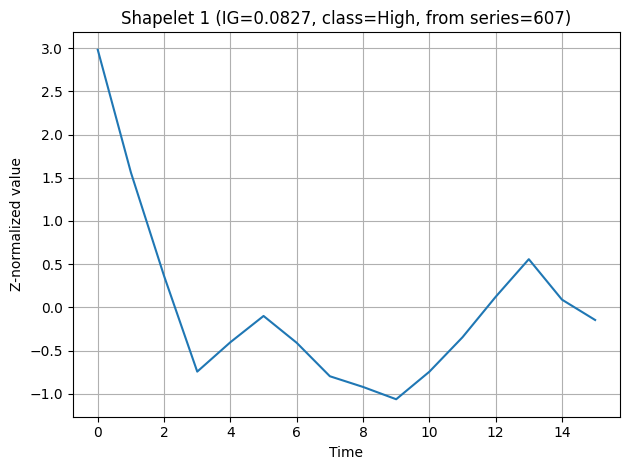

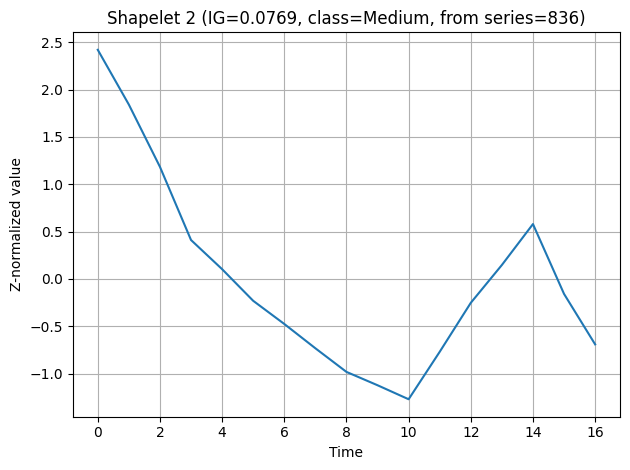

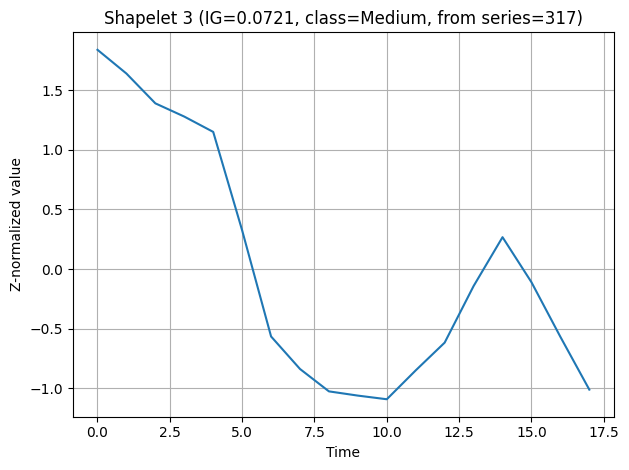

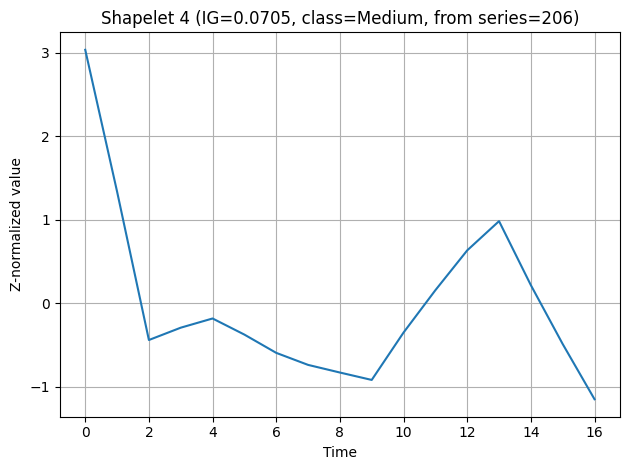

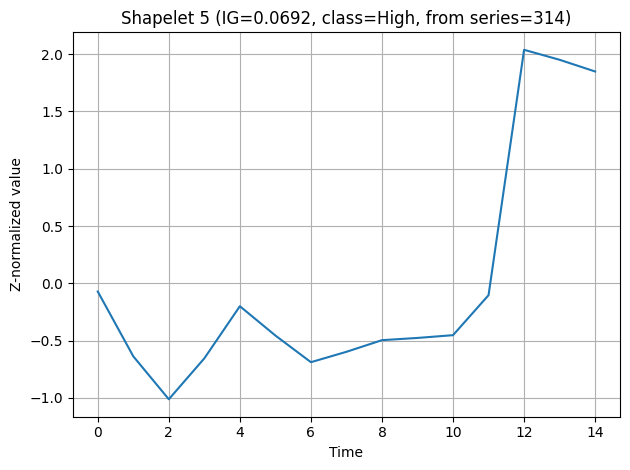

In [114]:
# Estrai shapelets come lista di dizionari
shapelet_list = []

for tup in stt.shapelets:
    shapelet_info = {
        'information_gain': tup[0],
        'length': tup[1],
        'start_pos': tup[2],
        'dimension': tup[3],
        'series_id': tup[4],
        'class_val': tup[5],
        'shapelet': tup[6]
    }
    shapelet_list.append(shapelet_info)

# Crea DataFrame ordinabile
df_shapelets = pd.DataFrame(shapelet_list)

# Ordina per information gain decrescente
df_sorted = df_shapelets.sort_values(by='information_gain', ascending=False)

# Visualizza le top 5 shapelet
for i in range(5):
    shp = df_sorted.iloc[i]
    plt.figure()
    plt.plot(shp['shapelet'])
    plt.title(f"Shapelet {i+1} (IG={shp['information_gain']:.4f}, class={shp['class_val']}, from series={shp['series_id']})")
    plt.xlabel("Time")
    plt.ylabel("Z-normalized value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


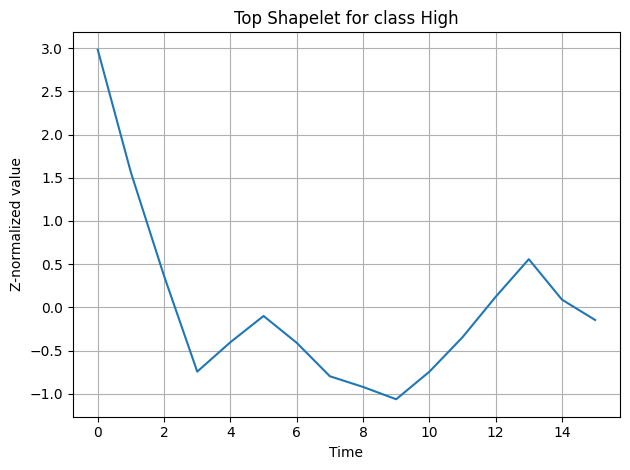

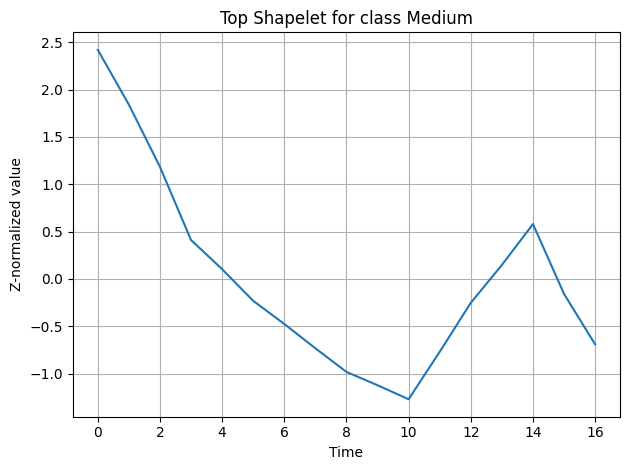

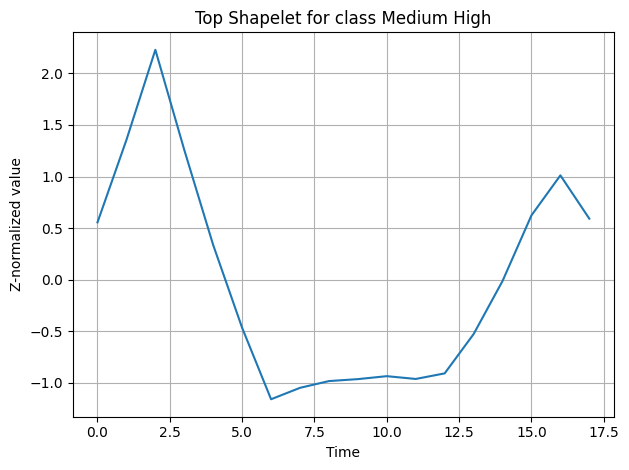

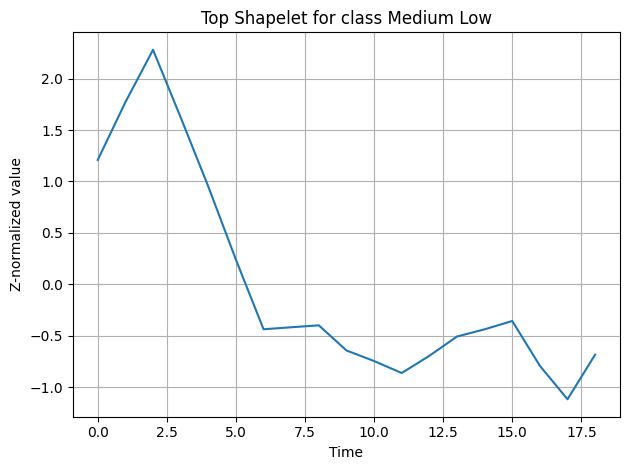

In [116]:
# Raggruppa per classe e prendi la shapelet con il massimo IG
top_per_class = df_shapelets.sort_values(by='information_gain', ascending=False).groupby('class_val').first().reset_index()

for i, row in top_per_class.iterrows():
    plt.figure()
    plt.plot(row['shapelet'])
    plt.title(f"Top Shapelet for class {row['class_val']}")
    plt.xlabel("Time")
    plt.ylabel("Z-normalized value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

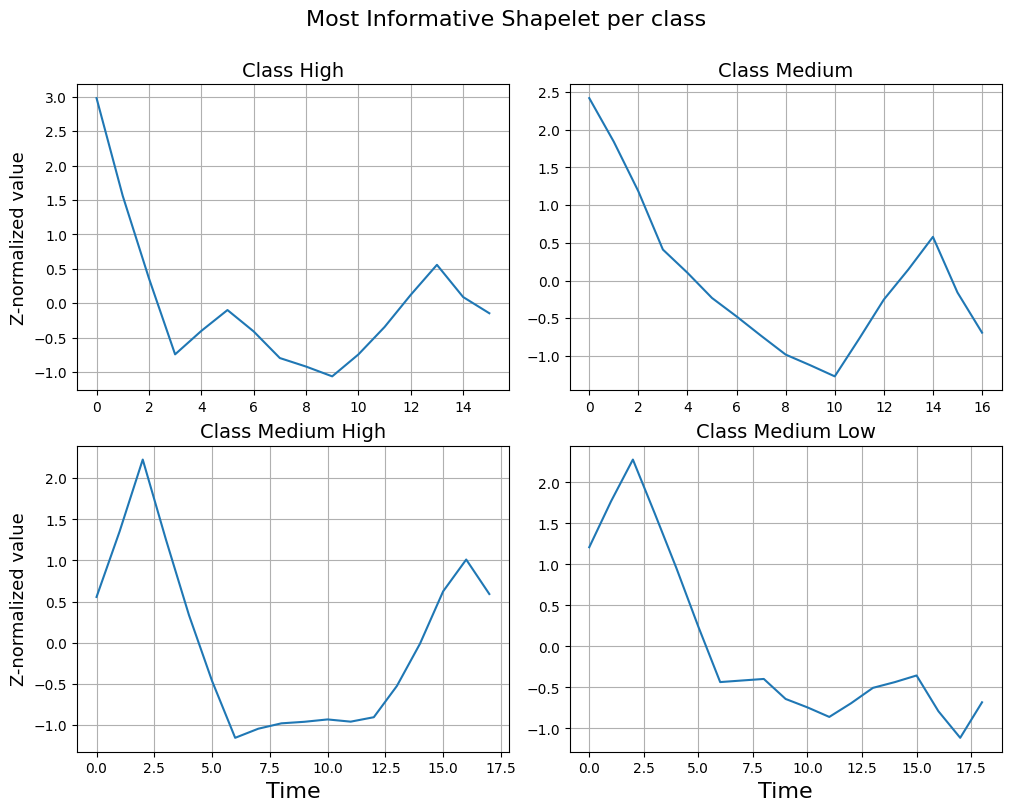

In [123]:
# Raggruppa per classe e prendi la shapelet con il massimo IG
top_per_class = df_shapelets.sort_values(by='information_gain', ascending=False).groupby('class_val').first().reset_index()

# Crea figura 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)
axes = axes.flatten()

for i, (idx, row) in enumerate(top_per_class.iterrows()):
    ax = axes[i]
    ax.plot(row['shapelet'])
    ax.set_title(f"Class {row['class_val']}", fontsize=14)

    # Solo la prima colonna ha label Y (indice 0 e 2)
    if i % 2 == 0:
        ax.set_ylabel("Z-normalized value", fontsize=13)
    else:
        ax.set_ylabel("")

    # Solo la seconda riga ha label X (indice 2 e 3)
    if i >= 2:
        ax.set_xlabel("Time", fontsize=16)
    else:
        ax.set_xlabel("")

    ax.grid(True)

# Disattiva eventuali subplot vuoti
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle("Most Informative Shapelet per class\n", fontsize=16)
plt.show()


In [12]:
from sktime.classification.shapelet_based import ShapeletLearningClassifierPyts

In [13]:
sl = ShapeletLearningClassifierPyts(n_shapelets_per_size=0.14, random_state=100)

In [14]:
%%time
sl.fit(X_train, y_train)

c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Impossibile trovare il file specificato
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", lin

CPU times: total: 1min 30s
Wall time: 57 s


ShapeletLearningClassifierPyts(n_shapelets_per_size=0.14, random_state=100)

In [15]:
sl.score(X_test, y_test)

0.44014084507042256

In [16]:
y_pred = sl.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.44014084507042256
F1-score [0.51041667 0.53710247 0.         0.        ]
              precision    recall  f1-score   support

        High       0.50      0.52      0.51        94
      Medium       0.41      0.78      0.54        97
 Medium High       0.00      0.00      0.00        58
  Medium Low       0.00      0.00      0.00        35

    accuracy                           0.44       284
   macro avg       0.23      0.33      0.26       284
weighted avg       0.31      0.44      0.35       284



c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera